## Plots ##
Here we can build the plots for each sub-box by choosing it (a,b,c values). 

In [1]:
import os 
import numpy as np
import math as m
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pathlib import Path
from PyPDF2 import PdfFileMerger
from PyPDF2 import PdfFileReader

#read files

def read_file(arx,path,m,l,n,lent):
        
    with open(path+'/'+arx+'.csv', 'r') as inp, open(path+'/'+arx+'.txt', 'w') as out:
        for line in inp:
            line = line.replace(',', ':')
            out.write(line)
        
    with open(path+'/'+arx+'.txt','r') as f:
        f2 = f.readlines()
        f.close()
     
    if arx == 'tauTteo' or arx == 'tauTgrad':   
        var = np.loadtxt(f2, usecols=(1,2,3,4,5,6))
        
        var = np.swapaxes(var,0,1)
        
        var = var.reshape(6,m,l,n,lent)
        
        out = np.zeros((3,3,m,l,n,lent))
        out[0,0,:,:,:,:] = var[0,:,:,:,:]
        out[0,1,:,:,:,:] = var[1,:,:,:,:]
        out[0,2,:,:,:,:] = var[2,:,:,:,:]
        out[1,1,:,:,:,:] = var[3,:,:,:,:]
        out[1,2,:,:,:,:] = var[4,:,:,:,:]
        out[2,2,:,:,:,:] = var[5,:,:,:,:]
        out[1,0,:,:,:,:] = var[1,:,:,:,:]
        out[2,0,:,:,:,:] = var[2,:,:,:,:]
        out[2,1,:,:,:,:] = var[4,:,:,:,:]
        
    elif arx == 'tauSteo' or arx == 'tauSgrad':
        var = np.loadtxt(f2, usecols=(1,2,3))
        
        var = np.swapaxes(var,0,1)
        
        var = var.reshape(3,m,l,n,lent)
        
        out = var
    
    elif arx == 'tauMteo' or arx == 'tauMgrad': 
        var = np.loadtxt(f2, usecols=(1,2,3))
        
        var = np.swapaxes(var,0,1)
        
        var = var.reshape(3,m,l,n,lent)
        
        out = np.zeros((3,3,m,l,n,lent))
        out[0,1,:,:,:,:] = var[0,:,:,:,:]
        out[0,2,:,:,:,:] = var[1,:,:,:,:]
        out[1,2,:,:,:,:] = var[2,:,:,:,:]
        out[1,0,:,:,:,:] = -var[0,:,:,:,:]
        out[2,0,:,:,:,:] = -var[1,:,:,:,:]
        out[2,1,:,:,:,:] = -var[2,:,:,:,:]
        
    return out

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


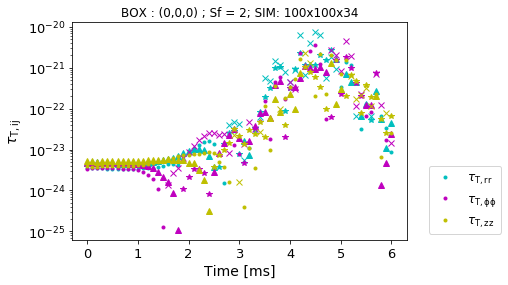

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


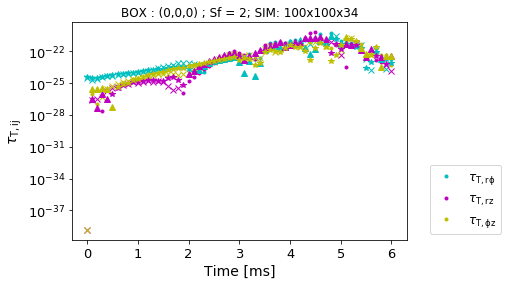

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


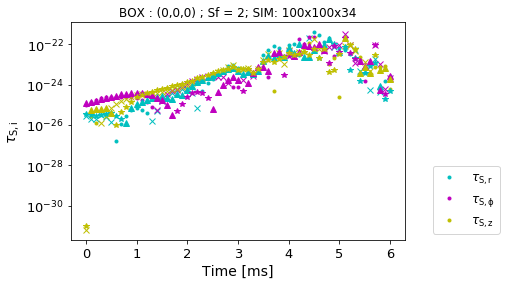

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


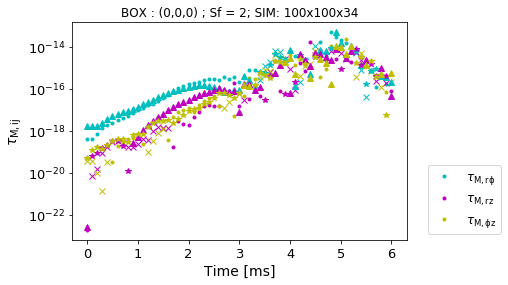

In [6]:
#PLOTS
Sf = 2
lenr = 100
lenphi = 100
lenz = 34

if lenphi == 800 :
        
    t_turb = 8.5
    lent = 26
    t_final = 12.5
        
elif lenphi == 100 :
    
    t_turb = 4
    lent = 61
    t_final = 6
        
elif lenphi == 240 : 
        
    t_turb = 8.5
    lent = 61
    t_final = 30
        
elif lenphi == 400 :
        
    t_turb = 8.5
    lent = 18
    t_final = 8.5

m = int(lenr/Sf)
l = int(lenphi/Sf)
n = int(lenz/Sf)

t = np.linspace(0,t_final,lent)

path = str(os.getcwd())+'/Sf_'+str(Sf)+'/'+str(lenr)+'_'+str(lenphi)+'_'+str(lenz)+'/sfs_tensors'
pathfile = path+'/text_files'
tau_T_theo = read_file('tauTteo',pathfile,m,l,n,lent)
#print(tau_T_theo.type)
tau_S_theo = read_file('tauSteo',pathfile,m,l,n,lent)
tau_M_theo = read_file('tauMteo',pathfile,m,l,n,lent)
tau_T_grad = read_file('tauTgrad',pathfile,m,l,n,lent)
tau_S_grad = read_file('tauSgrad',pathfile,m,l,n,lent)
tau_M_grad = read_file('tauMgrad',pathfile,m,l,n,lent)

pathplots = path+'/plots'

try:
    os.mkdir(pathplots)
except OSError as error:
    print(error)
       
a = 0
b = 0
c = 0

fig, ax = plt.subplots()
ax.plot(t,tau_T_theo[0,0,a,b,c,:], linestyle='None', marker='.', color ='c',label = r'$\tau_{\rm{T},rr}$')
ax.plot(t,-tau_T_theo[0,0,a,b,c,:], linestyle='None', marker='x', color ='c')
ax.plot(t,tau_T_grad[0,0,a,b,c,:], linestyle='None', marker='^', color ='c')
ax.plot(t,-tau_T_grad[0,0,a,b,c,:], linestyle='None', marker='*', color ='c')
ax.plot(t,tau_T_theo[1,1,a,b,c,:], linestyle='None', marker='.', color ='m',label = r'$\tau_{\rm{T},\phi\phi}$')
ax.plot(t,-tau_T_theo[1,1,a,b,c,:], linestyle='None', marker='x', color ='m')
ax.plot(t,tau_T_grad[1,1,a,b,c,:], linestyle='None', marker='^', color ='m')
ax.plot(t,-tau_T_grad[1,1,a,b,c,:], linestyle='None', marker='*', color ='m')
ax.plot(t,tau_T_theo[2,2,a,b,c,:], linestyle='None', marker='.', color ='y',label = r'$\tau_{\rm{T},zz}$')
ax.plot(t,-tau_T_theo[2,2,a,b,c,:], linestyle='None', marker='x', color ='y')
ax.plot(t,tau_T_grad[2,2,a,b,c,:], linestyle='None', marker='^', color ='y')
ax.plot(t,-tau_T_grad[2,2,a,b,c,:], linestyle='None', marker='*', color ='y')
plt.yscale('log')
plt.title('BOX : ('+str(a)+','+str(b)+','+str(c)+') ; Sf = '+str(Sf)+'; SIM: '+str(lenr)+'x'+str(lenphi)+'x'+str(lenz))
plt.xlabel('Time [ms]', fontsize = '14')
plt.ylabel(r'$\tau_{\rm{T},ij}$', fontsize = '14')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
#plt.grid()
leg = ax.legend(bbox_to_anchor=(1.3,0),loc = 'lower right', frameon = 'True', prop={"size":12})
plt.savefig(pathplots+'/Tdiagonal_'+str(a)+'_'+str(b)+'_'+str(c)+'.eps',bbox_inches = 'tight')
plt.show()

fig, ax = plt.subplots()
ax.plot(t,tau_T_theo[0,1,a,b,c,:], linestyle='None', marker='.', color ='c',label = r'$\tau_{\rm{T},r\phi}$')
ax.plot(t,-tau_T_theo[0,1,a,b,c,:], linestyle='None', marker='x', color ='c')
ax.plot(t,tau_T_theo[0,2,a,b,c,:], linestyle='None', marker='.', color ='m',label = r'$\tau_{\rm{T},rz}$')
ax.plot(t,-tau_T_theo[0,2,a,b,c,:], linestyle='None', marker='x', color ='m')
ax.plot(t,tau_T_theo[1,2,a,b,c,:], linestyle='None', marker='.', color ='y',label = r'$\tau_{\rm{T},\phi z}$')
ax.plot(t,-tau_T_theo[1,2,a,b,c,:], linestyle='None', marker='x', color ='y')
ax.plot(t,tau_T_grad[0,1,a,b,c,:], linestyle='None', marker='^', color ='c')
ax.plot(t,-tau_T_grad[0,1,a,b,c,:], linestyle='None', marker='*', color ='c')
ax.plot(t,tau_T_grad[0,2,a,b,c,:], linestyle='None', marker='^', color ='m')
ax.plot(t,-tau_T_grad[0,2,a,b,c,:], linestyle='None', marker='*', color ='m')
ax.plot(t,tau_T_grad[1,2,a,b,c,:], linestyle='None', marker='^', color ='y')
ax.plot(t,-tau_T_grad[1,2,a,b,c,:], linestyle='None', marker='*', color ='y')
plt.yscale('log')
plt.title('BOX : ('+str(a)+','+str(b)+','+str(c)+') ; Sf = '+str(Sf)+'; SIM: '+str(lenr)+'x'+str(lenphi)+'x'+str(lenz))
plt.xlabel('Time [ms]', fontsize = '14')
plt.ylabel(r'$\tau_{\rm{T},ij}$', fontsize = '14')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
#plt.grid()
leg = ax.legend(bbox_to_anchor=(1.3,0),loc = 'lower right', frameon = 'True', prop={"size":12})
plt.savefig(pathplots+'/Tnondiagonal_'+str(a)+'_'+str(b)+'_'+str(c)+'.eps',bbox_inches = 'tight')
plt.show()

fig, ax = plt.subplots()
ax.plot(t,tau_S_theo[0,a,b,c,:], linestyle='None', marker='.', color ='c',label = r'$\tau_{\rm{S},r}$')
ax.plot(t,-tau_S_theo[0,a,b,c,:], linestyle='None', marker='x', color ='c')
ax.plot(t,tau_S_theo[1,a,b,c,:], linestyle='None', marker='.', color ='m',label = r'$\tau_{\rm{S},\phi}$')
ax.plot(t,-tau_S_theo[1,a,b,c,:], linestyle='None', marker='x', color ='m')
ax.plot(t,tau_S_theo[2,a,b,c,:], linestyle='None', marker='.', color ='y',label = r'$\tau_{\rm{S},z}$')
ax.plot(t,-tau_S_theo[2,a,b,c,:], linestyle='None', marker='x', color ='y')
ax.plot(t,tau_S_grad[0,a,b,c,:], linestyle='None', marker='^', color ='c')
ax.plot(t,-tau_S_grad[0,a,b,c,:], linestyle='None', marker='*', color ='c')
ax.plot(t,tau_S_grad[1,a,b,c,:], linestyle='None', marker='^', color ='m')
ax.plot(t,-tau_S_grad[1,a,b,c,:], linestyle='None', marker='*', color ='m')
ax.plot(t,tau_S_grad[2,a,b,c,:], linestyle='None', marker='^', color ='y')
ax.plot(t,-tau_S_grad[2,a,b,c,:], linestyle='None', marker='*', color ='y')
plt.yscale('log')
plt.title('BOX : ('+str(a)+','+str(b)+','+str(c)+') ; Sf = '+str(Sf)+'; SIM: '+str(lenr)+'x'+str(lenphi)+'x'+str(lenz))
plt.xlabel('Time [ms]', fontsize = '14')
plt.ylabel(r'$\tau_{\rm{S},i}$', fontsize = '14')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
#plt.grid()
leg = ax.legend(bbox_to_anchor=(1.3,0),loc = 'lower right', frameon = 'True', prop={"size":12})
plt.savefig(pathplots+'/S_'+str(a)+'_'+str(b)+'_'+str(c)+'.eps',bbox_inches = 'tight')
plt.show()

fig, ax = plt.subplots()
ax.plot(t,tau_M_theo[0,1,a,b,c,:], linestyle='None', marker='.', color ='c',label = r'$\tau_{\rm{M},r\phi}$')
ax.plot(t,-tau_M_theo[0,1,a,b,c,:], linestyle='None', marker='x', color ='c')
ax.plot(t,tau_M_theo[0,2,a,b,c,:], linestyle='None', marker='.', color ='m',label = r'$\tau_{\rm{M},rz}$')
ax.plot(t,-tau_M_theo[0,2,a,b,c,:], linestyle='None', marker='x', color ='m')
ax.plot(t,tau_M_theo[1,2,a,b,c,:], linestyle='None', marker='.', color ='y',label = r'$\tau_{\rm{M},\phi z}$')
ax.plot(t,-tau_M_theo[1,2,a,b,c,:], linestyle='None', marker='x', color ='y')
ax.plot(t,tau_M_grad[0,1,a,b,c,:], linestyle='None', marker='^', color ='c')
ax.plot(t,-tau_M_grad[0,1,a,b,c,:], linestyle='None', marker='*', color ='c')
ax.plot(t,tau_M_grad[0,2,a,b,c,:], linestyle='None', marker='^', color ='m')
ax.plot(t,-tau_M_grad[0,2,a,b,c,:], linestyle='None', marker='*', color ='m')
ax.plot(t,tau_M_grad[1,2,a,b,c,:], linestyle='None', marker='^', color ='y')
ax.plot(t,-tau_M_grad[1,2,a,b,c,:], linestyle='None', marker='*', color ='y')
plt.yscale('log')
plt.title('BOX : ('+str(a)+','+str(b)+','+str(c)+') ; Sf = '+str(Sf)+'; SIM: '+str(lenr)+'x'+str(lenphi)+'x'+str(lenz))
plt.xlabel('Time [ms]', fontsize = '14')
plt.ylabel(r'$\tau_{\rm{M},ij}$', fontsize = '14')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
#plt.grid()
leg = ax.legend(bbox_to_anchor=(1.3,0),loc = 'lower right', frameon = 'True', prop={"size":12})
plt.savefig(pathplots+'/M_'+str(a)+'_'+str(b)+'_'+str(c)+'.eps',bbox_inches = 'tight')
plt.show()